In [9]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [10]:
degrees= UNITS.degrees

In [58]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun   

num_G

dist_init= 1e10

VXinit= sqrt(2*num_G/dist_init)

VXinit


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

5.1522028298583118

In [191]:

condition= Condition(x0= 0, y0= -1e12, velocity= 5, angle = 20*degrees, duration= 1e8, T0= 0 )

In [192]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 100)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 




In [193]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/ dist), (x/ dist))
    
    xdir= P.x/ dist
    ydir= P.y/dist
    w= V.proj(tan_vect)/ tan_vect.mag 
    wx=w.x
    wy=w.y
    #print(w)

    F_grav= G* mass_sun *mass_toast/ dist**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xdir, -ydir) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, ax, ay
    
    
                     
    
    
slope_func(system.init,1,system)
    

(<Quantity(4.698463103929543, 'dimensionless')>,
 <Quantity(1.7101007166283435, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(-2.194282956898723e-11, 'dimensionless')>)

In [194]:

run_odeint(system, slope_func)

In [195]:
system.results

,x,y,vx,vy
0.000000e+00,0.000000e+00,-1.000000e+12,4.698463,1.710101
1.010101e+06,4.745922e+06,-9.999983e+11,4.698463,1.710079
2.020202e+06,9.491845e+06,-9.999965e+11,4.698463,1.710056
3.030303e+06,1.423777e+07,-9.999948e+11,4.698463,1.710034
4.040404e+06,1.898369e+07,-9.999931e+11,4.698463,1.710012
5.050505e+06,2.372961e+07,-9.999914e+11,4.698463,1.709990
6.060606e+06,2.847553e+07,-9.999896e+11,4.698463,1.709968
7.070707e+06,3.322146e+07,-9.999879e+11,4.698463,1.709946
8.080808e+06,3.796738e+07,-9.999862e+11,4.698463,1.709923
9.090909e+06,4.271330e+07,-9.999845e+11,4.698463,1.709901


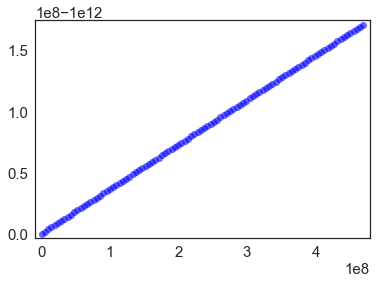

In [196]:
plot(system.results.x, system.results.y, "bo")
#plt.axis([-6e10, 6e10, -1.2e10, 1.2e10])

In [174]:
A= Vector(1, 3)

B= Vector(2, -6)

A.proj(B.hat())

<Quantity([-0.8  2.4], 'dimensionless')>